# Exploratory Data Analysis on the scraped lego data

The purpose of this script is to clean the data scraped using the LegoScraper project, and to do some Exploration of the data to get a feel for what columns may be useful in a ML model.

## Import the needed libraries


In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('imported')

imported


## Read in the data from the csv
A quick .info() is also run here to get an idea for the scale of the data and null values.

In [2]:
#read in raw data
lego_raw_df = pd.read_csv('legoData.csv',index_col = 0)

lego_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19145 entries, 0 to 19144
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     19145 non-null  object 
 1   Name           19144 non-null  object 
 2   Set_type       19144 non-null  object 
 3   Theme          19144 non-null  object 
 4   Theme_group    19143 non-null  object 
 5   Subtheme       15561 non-null  object 
 6   Year_released  19144 non-null  float64
 7   Pieces         15297 non-null  float64
 8   Minifigs       8456 non-null   float64
 9   Price          19145 non-null  float64
 10  Age_range      7032 non-null   object 
dtypes: float64(4), object(7)
memory usage: 1.8+ MB


## A quick look at the numerical data
The first step is to separate the numerical data and Categorical data

In [3]:

#separate into numeric and categorical features:
lego_num_columns = ['Year_released', 'Pieces', 'Minifigs', 'Price']
lego_num = lego_raw_df[lego_num_columns]
lego_cat_columns = ['Set_number', 'Name', 'Set_type', 'Theme', 'Theme_group', 'Subtheme', 'Age_range']
lego_cat = lego_raw_df[lego_cat_columns]

In [4]:
# describe() to see some of the basic stats
lego_raw_df.describe()


,Year_released,Pieces,Minifigs,Price
count,19144.000000,15297.000000,8456.000000,19145.000000
mean,2006.394693,224.932993,2.672304,18.556218
std,14.598790,469.083890,2.898825,39.792932
min,1949.000000,0.000000,1.000000,0.000000
25%,2000.000000,22.000000,1.000000,0.000000
50%,2011.000000,69.000000,2.000000,4.990000
75%,2017.000000,241.000000,3.000000,19.990000
max,2023.000000,11695.000000,80.000000,849.990000


## Histograms

Histograms of the numerical features

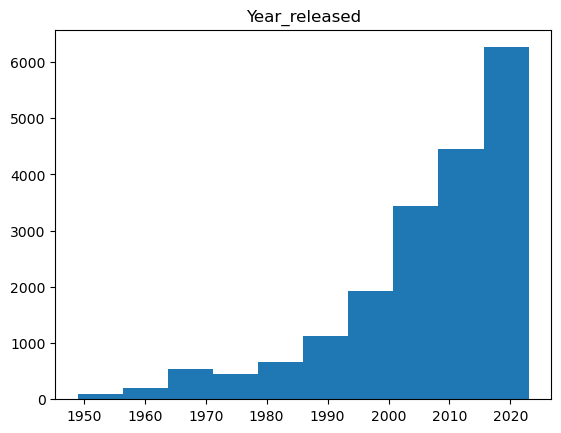

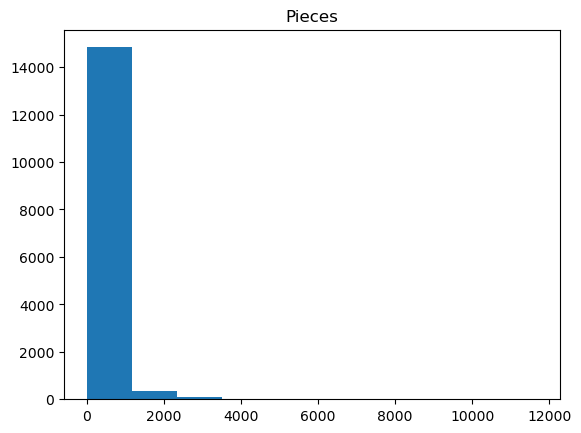

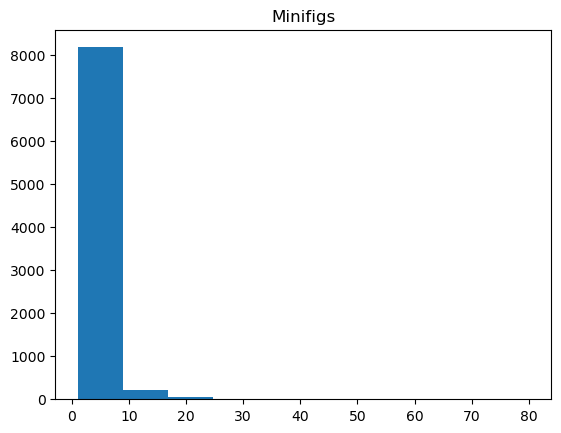

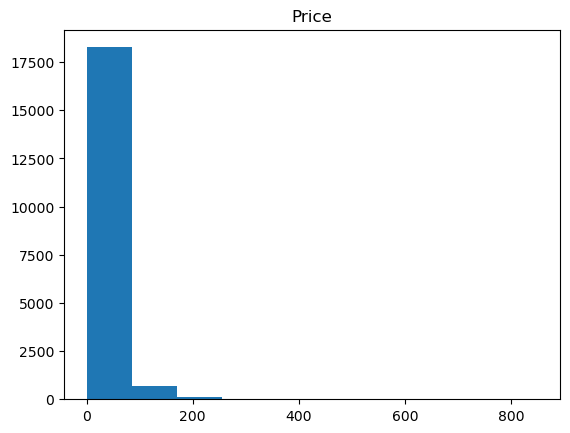

In [5]:


for i in lego_num.columns:
    plt.hist(lego_num[i])
    plt.title(i)
    plt.show()

We can see outliers scew the distributions quite heavily. Maybe these should be excluded?
## Correlations

A look at the correlations of the numerical data

               Year_released    Pieces  Minifigs     Price
Year_released       1.000000  0.171351  0.046618  0.198573
Pieces              0.171351  1.000000  0.484659  0.790404
Minifigs            0.046618  0.484659  1.000000  0.438881
Price               0.198573  0.790404  0.438881  1.000000


<Axes: >

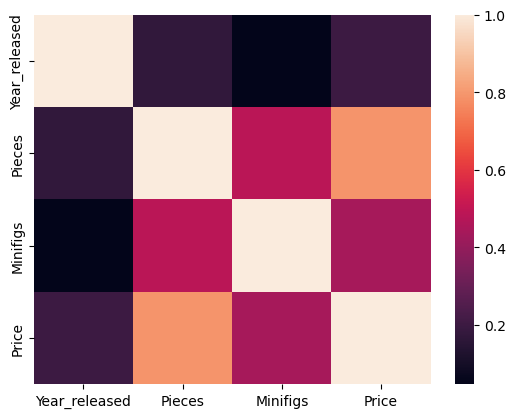

In [6]:
print(lego_num.corr())
sns.heatmap(lego_num.corr())


The following correlations are observed:
1. Pieces and price are very heavily correlated
2. Minifigs and price are also  correlated
3. No correlation between year released and number of minifigs

If price is what we want to end up predicting for new sets, then pieces and minifigs are definitely worth exploring,
however minifigs and price are also somewhat correlated, so that should be taken into account, as we don't want highly correlated features.

## Mean Price vs Numerical feature

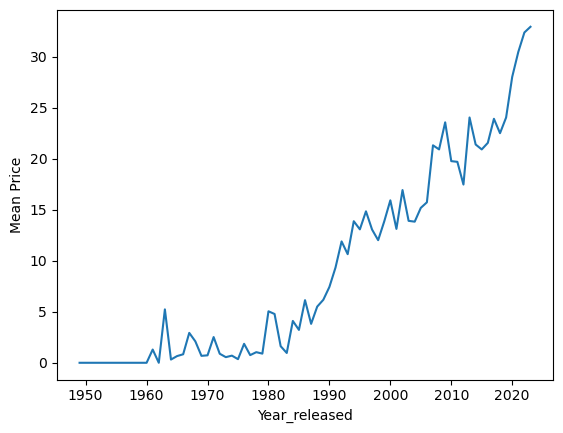

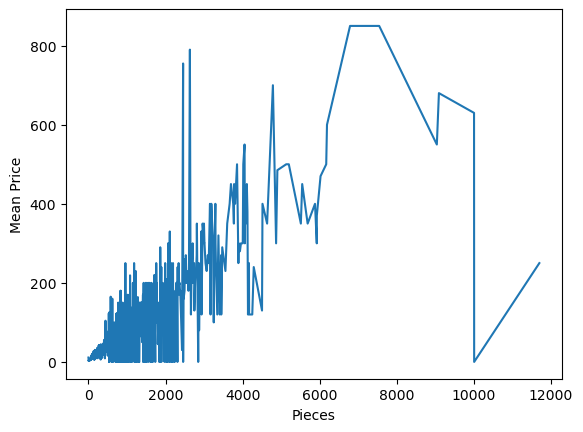

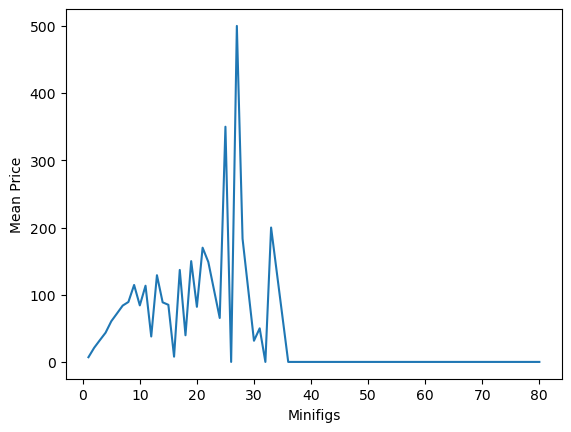

In [7]:


for i in lego_num_columns:
    if i !='Price':
        lego_group_mean = lego_num.groupby(i)['Price'].mean()
        ax = lego_group_mean.plot(kind ='line')
        ax.set_xlabel(i)
        ax.set_ylabel("Mean Price")
        plt.show()



These plots tell an interesting story.Such as pre 1960 there being little to no price data, and how the mean price becomes much more linear after ~1990.

It is also of note that the very high outlier piece numbers have a very strange relationship with price, but below these high piece count sets there is a somewhat linear relationship, though very noisy.

Minifigs also tells an interesting story, with a slight increase in the mean number of minifigs. 

Going to replot Pieces vs Avg Price but first round the price to the nearest 100 in order to smooth the graph out.

       Year_released  Pieces  Minifigs  Price
0             1949.0   100.0       NaN   0.00
1             1950.0     NaN       NaN   0.00
2             1950.0     NaN       NaN   0.00
3             1950.0     NaN       NaN   0.00
4             1950.0     NaN       NaN   0.00
...              ...     ...       ...    ...
19140         2023.0     NaN       NaN  22.99
19141         2023.0     NaN       NaN   0.00
19142         2023.0     NaN       NaN   0.00
19143         2023.0     NaN       NaN   0.00
19144         2023.0     NaN       NaN  10.95

[19145 rows x 4 columns]


/tmp/ipykernel_54937/1515535246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_rounded['Pieces']= lego_num['Pieces'].round(decimals =-2)


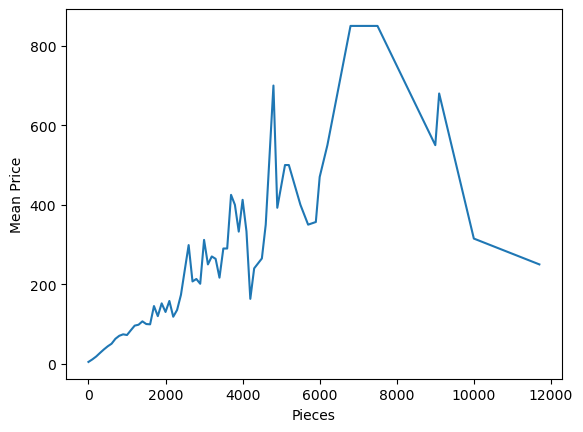

In [8]:

#for i in lego_num_columns:
lego_rounded = lego_num 
lego_rounded['Pieces']= lego_num['Pieces'].round(decimals =-2)
print(lego_rounded)
i = 'Pieces'
if i !='Price':
        lego_group_mean = lego_rounded.groupby(i)['Price'].mean()
        ax = lego_group_mean.plot(kind ='line')
        ax.set_xlabel(i)
        ax.set_ylabel("Mean Price")
        plt.show()

This is much more legible, the overall increasing trend is more apparent.
We'll look at the outlier values below.

In [9]:
lego_raw_df.loc[lego_raw_df.Pieces > 8000]

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
12832,BIGBOX-1,The Ultimate Battle for CHIMA,Other,LEGENDS OF CHIMA,Action/Adventure,PRODUCT COLLECTION,2015.0,10004.0,NaN,0.00,9+
16152,10276-1,Colosseum,Normal,ICONS,Model making,LANDMARKS,2020.0,9036.0,NaN,549.99,18+
16983,10294-1,Titanic,Normal,ICONS,Model making,MISCELLANEOUS,2021.0,9090.0,NaN,679.99,18+
17093,31203-1,World Map,Normal,ART,Art and crafts,MISCELLANEOUS,2021.0,11695.0,NaN,249.99,18+
17900,10307-1,Eiffel Tower,Normal,ICONS,Model making,LANDMARKS,2022.0,10001.0,NaN,629.99,18+


These sets are all legitimate sets, except set number 'BIGBOX-1', which was a competition prize. This has a price of 0.00. This will be remembered when cleaning the data.

# Categorical Data
We are going to briefly explore the content of the categorical data, by listing the number of unique values for each, as well as the number of nulls

In [10]:
#Next the categorical data.
#Lets look at the amount of unique values in each feature as well as the number of nulls
for i in lego_cat.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_cat[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_cat[i].isna().sum()))

#And also how many nulls there are in each column

Unique Set_numbers: 19145
Nulls in Set_number: 0
Unique Names: 15827
Nulls in Name: 1
Unique Set_types: 8
Nulls in Set_type: 1
Unique Themes: 154
Nulls in Theme: 1
Unique Theme_groups: 17
Nulls in Theme_group: 2
Unique Subthemes: 861
Nulls in Subtheme: 3584
Unique Age_ranges: 63
Nulls in Age_range: 12113


There are many unique themes, and even more unique subthemes.
We are going to look at batcharts of these, while some of the data may be impossible to read, due to the number of bars, it will give us an idea of the destribution across categories.

Every set has a theme and a theme group, however some sets have no subtheme.

There are 56 different Age_range, and very many nulls in the Age_range feature.

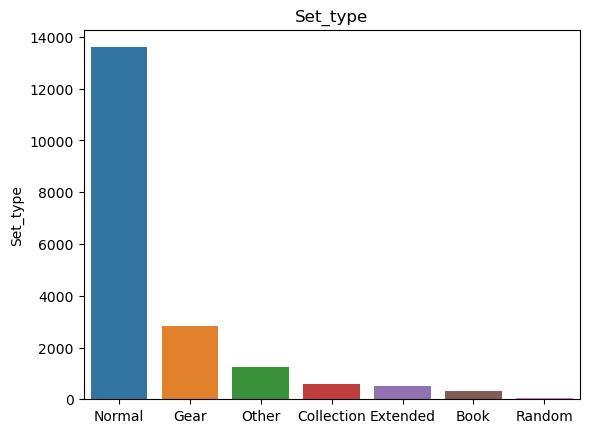

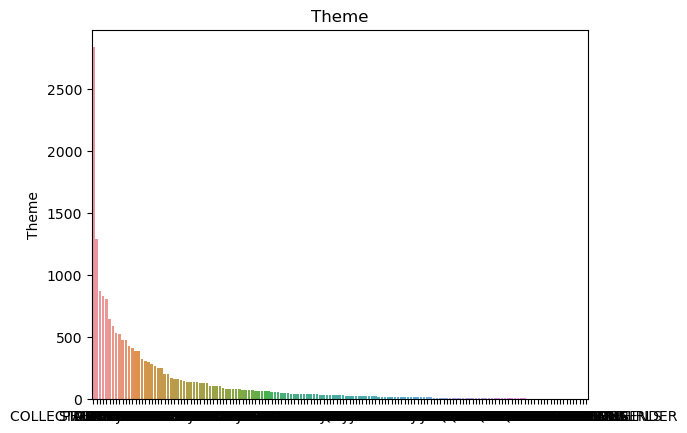

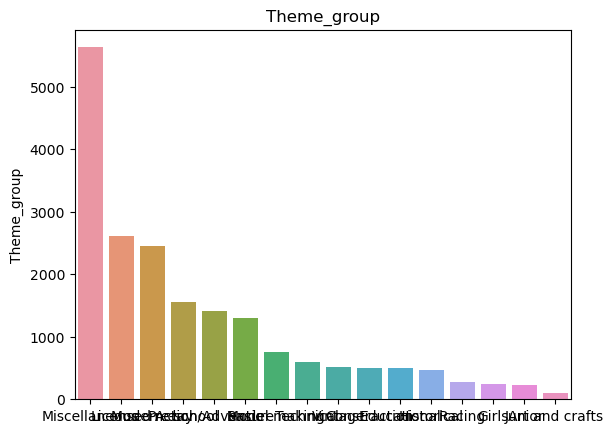

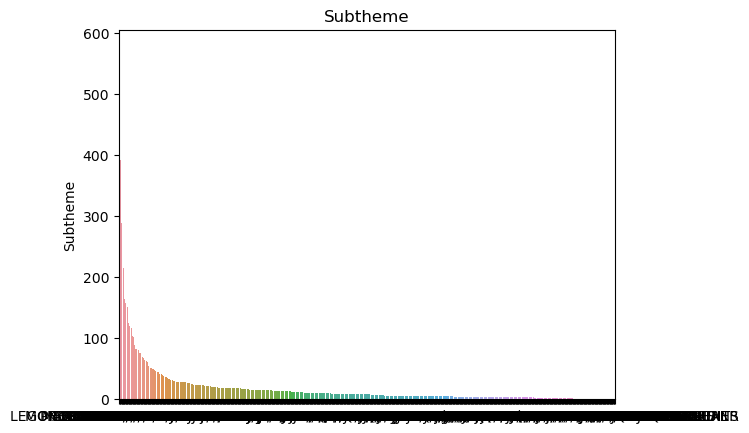

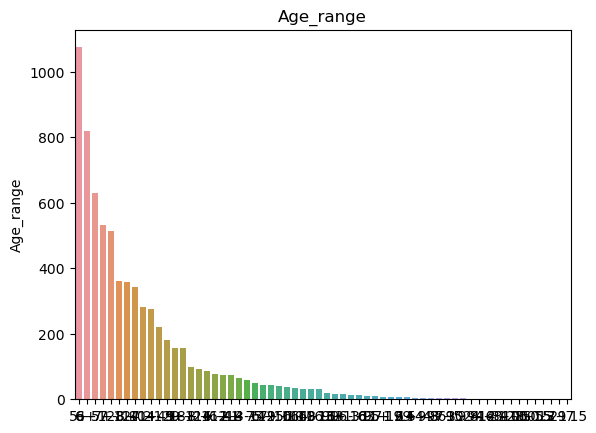

In [11]:
#a couple things to note from above. We have a lot of unique themes, and a lot of unique subthemes.
#every set has a theme and theme group
#only some sets have subthemes
#56 age ranges, and a lot of nulls in age range.

#we will print the counts of unique values in the =categorical columns, these will be impossible to distinguish, but might 
#point out any inconsistencies. We will be excluding Name and Id number as these are more indexes and unique to each set
for i in lego_cat.columns:
    if i not in ["Name","Set_number"]:
        plt.figure()
        sns.barplot(x=lego_cat[i].value_counts().index, y = lego_cat[i].value_counts()).set_title(i)
        plt.show
 

# Data Cleaning
## Numerical Features
In this section we will look at missing data, and figure out how best to handle this for each feature.
We will start by listing the numerical data and its null values.

In [12]:
#Check for nulls in numerical data
for i in lego_num.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_num[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_num[i].isna().sum()))

Unique Year_releaseds: 74
Nulls in Year_released: 1
Unique Piecess: 62
Nulls in Pieces: 3848
Unique Minifigss: 34
Nulls in Minifigs: 10689
Unique Prices: 391
Nulls in Price: 0


There is one set missing a release year, we can investigate this as it is only one set.

In [13]:
#First to take a look at the set that is missing a release year:
lego_raw_df.loc[lego_raw_df.Year_released.isna()]


,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
5830,KC028-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


After looking for the ID number on the soruce website (brickset), it is found that this is not a real set at all, and must have been an incorrect ID that the scraper picked up, or possibly that the page was moved. Either way the next step is to remove it from the data as it is an invalid entry.

In [14]:

lego_mod_df = lego_raw_df.dropna(subset=['Year_released'])

Next null and 0 piece counts

In [15]:
lego_mod_df[lego_mod_df.Pieces.isna()]

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
1,700_1_1-1,Individual 2 x 4 Bricks,Other,SYSTEM,Basic,SUPPLEMENTAL,1950.0,NaN,NaN,0.00,NaN
2,700_1_2-1,Individual 2 x 2 Bricks,Other,SYSTEM,Basic,SUPPLEMENTAL,1950.0,NaN,NaN,0.00,NaN
3,700_A-1,Automatic Binding Bricks Small Brick Set (Lego...,Other,SYSTEM,Basic,BASIC SET,1950.0,NaN,NaN,0.00,NaN
4,700_B_1-1,Individual 1 x 4 x 2 Window (without glass),Other,SYSTEM,Basic,SUPPLEMENTAL,1950.0,NaN,NaN,0.00,NaN
5,700_B_2-1,Individual 1 x 2 x 3 Window (without glass),Other,SYSTEM,Basic,SUPPLEMENTAL,1950.0,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19140,5007851-1,"Brick Botanicals 1,000-Piece Puzzle",Gear,GEAR,Miscellaneous,JIGSAW,2023.0,NaN,NaN,22.99,9+
19141,BLOCKS099-1,Blocks magazine issue 99,Book,BOOKS,Miscellaneous,MAGAZINES/BLOCKS,2023.0,NaN,NaN,0.00,NaN
19142,BLOCKS100-1,Blocks magazine issue 100,Book,BOOKS,Miscellaneous,MAGAZINES/BLOCKS,2023.0,NaN,NaN,0.00,NaN
19143,BLOCKS101-1,Blocks magazine issue 101,Book,BOOKS,Miscellaneous,MAGAZINES/BLOCKS,2023.0,NaN,NaN,0.00,NaN


In [16]:
lego_mod_df.loc[lego_mod_df.Pieces ==0]

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
94,214-4,Windows and Doors Retailer Pack,Collection,SYSTEM,Basic,SUPPLEMENTAL,1957.0,0.0,NaN,0.00,NaN
3841,8299-1,Search Sub,Collection,TECHNIC,Technical,NaN,1997.0,0.0,1.0,50.00,NaN
16182,11929-1,Parts for The LEGO Games Book,Collection,MISCELLANEOUS,Miscellaneous,BOOK PARTS,2020.0,0.0,NaN,0.00,6+
16183,11930-1,Parts for Halloween Ideas,Collection,MISCELLANEOUS,Miscellaneous,BOOK PARTS,2020.0,0.0,NaN,0.00,6+
16553,71361-11,Character Pack Series 1 - Complete,Collection,SUPER MARIO,Licensed,CHARACTER PACK - SERIES 1,2020.0,0.0,10.0,0.00,NaN
17340,66678-1,LEGO Minifigures - Marvel Studios Series {Box ...,Random,COLLECTABLE MINIFIGURES,Miscellaneous,MARVEL STUDIOS,2021.0,0.0,NaN,29.94,5+
17406,71386-11,Character Pack Series 2 - Complete,Collection,SUPER MARIO,Licensed,CHARACTER PACK - SERIES 2,2021.0,0.0,10.0,0.00,NaN
17426,71394-11,Character Pack Series 3 - Complete,Collection,SUPER MARIO,Licensed,CHARACTER PACK - SERIES 3,2021.0,0.0,10.0,4.99,NaN
18205,66700-1,LEGO Minifigures - Series 22 {Box of 6 random ...,Random,COLLECTABLE MINIFIGURES,Miscellaneous,SERIES 22,2022.0,0.0,NaN,29.94,5+
18262,71035-1,LEGO Minifigures - The Muppets Series {Box of ...,Random,COLLECTABLE MINIFIGURES,Miscellaneous,THE MUPPETS,2022.0,0.0,NaN,29.94,5+


The question of what to do with this data is a tough one, by reviewing a snippet of the data we see that there are many old sets that have little data associated with them, as well as magazines, and as mentioned above, promotional and "prize" sets for competitions. While it migth be possible to impute the value. I think it would make the most sense to drop these rows entirely, as many of them are not regular lego sets.

Many of the minifigure "blind bags" are given a piece count of 0 and these are also not regular lego sets, so will be removed from the data.

In [17]:
#We are going to drop the null pieces and any that are set to 0 for some reason:
lego_mod_df = lego_mod_df.dropna(subset=['Pieces'])

lego_mod_df = lego_mod_df[lego_mod_df.Pieces !=0.00]


The question of what to do with minifigs is somewhat easier. If a product is not listed as having any minifigs it is likely that the set in question just does not contain any and as such null values will be set to 0.

In [18]:
#we are going to set NaN minifigs to 0. This should be correct in the vast majority of cases

lego_mod_df.Minifigs = lego_mod_df.Minifigs.fillna(0)
lego_num = lego_mod_df[['Year_released', 'Pieces', 'Minifigs', 'Price']]
for i in lego_num.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_num[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_num[i].isna().sum()))

Unique Year_releaseds: 70
Nulls in Year_released: 0
Unique Piecess: 1421
Nulls in Pieces: 0
Unique Minifigss: 32
Nulls in Minifigs: 0
Unique Prices: 374
Nulls in Price: 0


We can see now that all of the null values in our numerical data is gone. However there is still the question of "Free" sets, those with a price of 0.00.


In [19]:
lego_mod_df[lego_raw_df.Price==0.00]


/tmp/ipykernel_54937/3891099145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lego_mod_df[lego_raw_df.Price==0.00]


,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
0,700-12,Automatic Binding Bricks,Normal,SYSTEM,Basic,BASIC SET,1949.0,142.0,0.0,0.0,NaN
32,1200-1,"LEGO Town Plan Board, Large Plastic",Normal,SYSTEM,Basic,TOWN PLAN,1955.0,1.0,0.0,0.0,NaN
33,1210-2,Small Store Set,Normal,SYSTEM,Basic,TOWN PLAN,1955.0,30.0,0.0,0.0,NaN
34,1211-2,Small House Set,Normal,SYSTEM,Basic,TOWN PLAN,1955.0,19.0,0.0,0.0,NaN
35,1212-2,Small House - Left Set,Normal,SYSTEM,Basic,TOWN PLAN,1955.0,21.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19119,682303-1,Miles Morales,Other,MARVEL SUPER HEROES,Licensed,MAGAZINE GIFT,2023.0,8.0,1.0,0.0,NaN
19124,892302-1,Golden Dragon Jay,Other,NINJAGO,Action/Adventure,MAGAZINE GIFT,2023.0,3.0,1.0,0.0,NaN
19130,912302-1,Bo-Katan Kryze,Other,STAR WARS,Licensed,MAGAZINE GIFT,2023.0,8.0,1.0,0.0,NaN
19131,912303-1,212th Clone Trooper,Other,STAR WARS,Licensed,MAGAZINE GIFT,2023.0,5.0,1.0,0.0,NaN


We see examples of really old sets which just have no price, and we see magazine gifts. Thinking about it, any set given away for free are not really useful. If we are looking to predict price, then it would seem that these sets should be excluded.

In [20]:
lego_mod_df = lego_mod_df[lego_mod_df.Price !=0.00]

## Categorical features

In [21]:
#refreshing my list of numerica and categorical data after the Numerical null values have been taken care of:
#separate into numeric and categorical features:

lego_cat = lego_mod_df[lego_cat_columns]

#Lets look at the amount of unique values in each feature as well as the number of nulls
for i in lego_cat.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_cat[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_cat[i].isna().sum()))


Unique Set_numbers: 9408
Nulls in Set_number: 0
Unique Names: 8484
Nulls in Name: 0
Unique Set_types: 6
Nulls in Set_type: 0
Unique Themes: 148
Nulls in Theme: 0
Unique Theme_groups: 16
Nulls in Theme_group: 0
Unique Subthemes: 646
Nulls in Subtheme: 1877
Unique Age_ranges: 56
Nulls in Age_range: 3857


Next I'm going to look at each categorical feature in turn and see how we might engineer it and the data in order to get cleaner 
for a model.

### Set Type
Let's turn to Set_Type, as it has the fewest numbers of unique entries, and so might allow us to remove large numbers
of unnecessary data.



In [22]:
lego_mod_df.Set_type.unique()

array(['Normal', 'Other', 'Collection', 'Book', 'Extended', 'Random'],
      dtype=object)

Examination of the "Extended" Set_type shows and item which is a CD-rom. These are clearly not lego sets,
as such these should be removed. It would be difficult to go through every entry to see if it is a CD or not.
An alternate solution is to put a minimum piece number on our data. By setting this to ten we also exclude any of the mystery packets of individual minifigs that we might have missed, which  I am also excluding from this model.
(Honestly, I'm just looking to predict the price of Star Wars ship sets based on rumours)

It would seem that "Book" values should be removed as these are not lego sets.


In [23]:
#Remove books
unwanted_Set_types = ['Book']
lego_mod_df = lego_mod_df[~lego_mod_df.Set_type.isin(unwanted_Set_types)]


#Inspect Extended Set type
lego_mod_df.loc[lego_mod_df.Set_type=='Extended']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
7945,4524081-1,Mindstorms NXT CD,Extended,MINDSTORMS,Technical,NXT,2007.0,1.0,0.0,19.99,NaN
8318,852271-1,Knights Battle Pack,Extended,CASTLE,Historical,BATTLE PACK,2008.0,35.0,5.0,14.99,NaN
8319,852272-1,Skeletons Battle Pack,Extended,CASTLE,Historical,BATTLE PACK,2008.0,43.0,5.0,14.99,NaN
8339,852331-1,Vintage Minifigure Collection Vol. 1,Extended,MISCELLANEOUS,Miscellaneous,MINIFIGURE COLLECTION,2008.0,21.0,5.0,17.99,6+
8743,852535-1,Vintage Minifigure Collection Vol. 2,Extended,MISCELLANEOUS,Miscellaneous,MINIFIGURE COLLECTION,2009.0,24.0,5.0,17.99,6+
...,...,...,...,...,...,...,...,...,...,...,...
19125,910002-1,Studgate Train Station,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,4062.0,0.0,399.99,18+
19126,910004-1,Winter Chalet,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,2705.0,0.0,199.99,18+
19127,910008-1,Modular Construction Site,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,3371.0,0.0,319.99,18+
19128,910011-1,1950's Diner,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,1377.0,0.0,129.99,18+


Examination of the "Extended" Set_type shows and item which is a CD-rom. These are clearly not lego sets,
as such these should be removed. It would be difficult to go through every entry to see if it is a CD or not.
An alternate solution is to put a minimum piece number on our data. By setting this to ten we also exclude 
many of the mystery packets of individual minifigs, which  I am also excluding from this model.
(Honestly, I'm just looking to predict the price of Star Wars ship sets based on rumours)

By examining Extended we see some from the "Bricklink". These sets are not related to Lego and are created by a third party site, and should be removed as they are not officially priced

In [24]:

                                                     
lego_mod_df = lego_mod_df[lego_mod_df.Pieces >10]

unwanted_Themes = ['BRICKLINK']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme.isin(unwanted_Themes)]
                                                     
                                                


Next we will look at the data for the collection Set_type.

In [25]:

lego_mod_df.loc[lego_mod_df.Set_type=='Collection']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
547,005-2,Discovery Set,Collection,SAMSONITE,Vintage,BASIC SET,1967.0,328.0,0.0,9.95,NaN
655,310-1,Motorized Truck Set,Collection,SAMSONITE,Vintage,MODEL MAKER,1969.0,184.0,0.0,12.95,NaN
2085,0011-3,2 For 1 Bonus Offer,Collection,CASTLE,Historical,BONUS/VALUE PACK,1987.0,151.0,0.0,1.50,NaN
2370,1616-1,Special Two-Set Space Pack,Collection,SPACE,Action/Adventure,BONUS/VALUE PACK,1989.0,132.0,0.0,10.00,NaN
2544,1675-1,Three Set Bonus Pack,Collection,ASSORTED,Miscellaneous,BONUS/VALUE PACK,1990.0,150.0,0.0,10.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17809,5007060-1,The Team Up Bundle,Collection,SUPER MARIO,Licensed,PRODUCT COLLECTION,2021.0,511.0,0.0,119.98,NaN
17810,5007061-1,The Creative Bundle,Collection,SUPER MARIO,Licensed,PRODUCT COLLECTION,2021.0,1081.0,0.0,129.97,NaN
17811,5007062-1,The Ultimate Bundle,Collection,SUPER MARIO,Licensed,PRODUCT COLLECTION,2021.0,3009.0,0.0,299.95,NaN
18260,71034-13,LEGO Minifigures - Series 23 - Complete,Collection,COLLECTABLE MINIFIGURES,Miscellaneous,SERIES 23,2022.0,101.0,12.0,4.99,5+


This seems reasonable at a glance. So next is Random

In [26]:
lego_mod_df.loc[lego_mod_df.Set_type=='Random']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
14790,41775-0,Blind Bags Series 1 {Random bag},Random,UNIKITTY,Licensed,BLIND BAGS SERIES 1,2018.0,14.0,0.0,3.99,5 - 12


This is clearly not a lego set, but a blind bag, however, we can see from this that there is a blind bag subtheme
I will remove rows where the subtheme has "BLIND BAG in the string."


In [27]:
lego_mod_df = lego_mod_df[lego_mod_df.Subtheme.str.contains("BLIND BAG", na=False) == False]


Finally we will look at the "Other" Set_type.

In [28]:
lego_mod_df.loc[lego_mod_df.Set_type=='Other']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
223,214_10-2,1 x 2 x 4 Glass Door in Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,13.0,0.0,0.50,3 - 12
231,214_5-2,1 x 3 x 2 Window in Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,12.0,0.0,0.50,3 - 12
233,214_6-2,1 x 2 x 2 Window in Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,15.0,0.0,0.50,3 - 12
235,214_7-2,1 x 1 x 2 Window Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,19.0,0.0,0.50,3 - 12
237,214_8-2,1 x 2 x 1 Window Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,19.0,0.0,0.50,3 - 12
239,214_9-2,1 x 1 x 1 Window Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,20.0,0.0,0.50,3 - 12
240,225_A-1,1 x 6 Beams,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,13.0,0.0,0.50,3 - 12
241,225_B-1,1 x 8 Beams,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,12.0,0.0,0.50,3 - 12
248,521_2-1,1 x 1 and 1 x 2 Plates,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,80.0,0.0,0.50,3 - 12
365,280_3-1,Assorted Bevelled Bricks,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1965.0,34.0,0.0,0.50,NaN


We can see upon running the command above for the first time there are many SUPPLEMENTAL but also PROMOTIONAL pieces in this Set_type. These do not apply to sets bought in stores, and as such they will be removed from the data. As well as this it would seem the Other set type does not contain any in store non promotional lego sets, so I'll be dropping any sets that are in this category.


In [29]:
unwanted_Subtheme = ['SUPPLEMENTAL', 'PROMOTIONAL']
lego_mod_df = lego_mod_df[~lego_mod_df.Subtheme.isin(unwanted_Subtheme)]
lego_mod_df = lego_mod_df[lego_mod_df.Set_type!= 'Other']


### Theme group
Theme group is a feature to look at next, as it contains a relatively small number valid entries and no nulls.
These are not readable from the bar chart, so I'll list them

In [30]:
lego_mod_df.Theme_group.unique()

array(['Vintage', 'Modern day', 'Basic', 'Educational', 'Miscellaneous',
       'Action/Adventure', 'Technical', 'Junior', 'Pre-school',
       'Historical', 'Model making', 'Girls', 'Racing', 'Licensed',
       'Constraction', 'Art and crafts'], dtype=object)

These Theme_groups hold a lot of information, and may prove a valuable feature.
One would expect the "Licensed" sets to be higher in price due to licensing fees.
However, some of these values will need to be investigated to see if the warrant removal, in the same manner as Set_type.
I will not list them out individually this time and will instead list and remove the unecessary values all at once

Pre-school is removed as it contains mostly Duplo, which is not lego and is aimed at toddlers. We have also found the theme SCALA should be removed, as well as Belville and CLIKITS (this is the full Girls themegroup).

We will also remove BIONICLE (even though they are near and dear to my heart). This is because they're not quite lego
HERO FACTORY is in the same boat.

In [31]:
Unwated_themegroups =['Pre-school']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme_group.isin(Unwated_themegroups)]

Unwanted_themes =['SCALA','BELVILLE', 'CLIKITS','BIONICLE', 'HERO FACTORY']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme.isin(Unwanted_themes)]


In [32]:
#Quick check to see how much data we have removed (quite a lot)
lego_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6914 entries, 212 to 19112
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     6914 non-null   object 
 1   Name           6914 non-null   object 
 2   Set_type       6914 non-null   object 
 3   Theme          6914 non-null   object 
 4   Theme_group    6914 non-null   object 
 5   Subtheme       5618 non-null   object 
 6   Year_released  6914 non-null   float64
 7   Pieces         6914 non-null   float64
 8   Minifigs       6914 non-null   float64
 9   Price          6914 non-null   float64
 10  Age_range      4224 non-null   object 
dtypes: float64(4), object(7)
memory usage: 648.2+ KB


### Themes
We'll start with seeing how many themes we are down to, as we've removed a lot of data above.

In [33]:
#and also a check to see how many themes and other unique entries
for i in lego_mod_df.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_mod_df[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_mod_df[i].isna().sum()))

Unique Set_numbers: 6914
Nulls in Set_number: 0
Unique Names: 6267
Nulls in Name: 0
Unique Set_types: 3
Nulls in Set_type: 0
Unique Themes: 133
Nulls in Theme: 0
Unique Theme_groups: 14
Nulls in Theme_group: 0
Unique Subthemes: 540
Nulls in Subtheme: 1296
Unique Year_releaseds: 62
Nulls in Year_released: 0
Unique Piecess: 1326
Nulls in Pieces: 0
Unique Minifigss: 29
Nulls in Minifigs: 0
Unique Prices: 331
Nulls in Price: 0
Unique Age_ranges: 48
Nulls in Age_range: 2690


We've shortened the list of unique themes, I'll list them here so we can take a look at them:

In [34]:
lego_mod_df.Theme.unique()

array(['SAMSONITE', 'TRAINS', 'SYSTEM', 'LEGOLAND',
       'UNIVERSAL BUILDING SET', 'BUILDING SET WITH PEOPLE', 'HOMEMAKER',
       'BASIC', 'DACTA', 'SERVICE PACKS', 'SPACE', 'TOWN', 'TECHNIC',
       'FABULAND', 'CASTLE', 'BOATS', 'PIRATES', 'ASSORTED', 'MODEL TEAM',
       'AQUAZONE', 'FREESTYLE', 'TIME CRUISERS', 'WESTERN', 'CLASSIC',
       'ADVENTURERS', 'ZNAP', 'RACERS', 'MINDSTORMS', 'SEASONAL',
       'ROCK RAIDERS', 'STAR WARS', 'EDUCATION', 'STUDIOS', 'SPORTS',
       'BULK BRICKS', 'ADVANCED MODELS', 'MICKEY MOUSE', 'CREATOR',
       'JACK STONE', 'HARRY POTTER', 'DINOSAURS', 'ALPHA TEAM',
       'SPYBOTICS', 'ISLAND XTREME STUNTS', 'GALIDOR', 'WORLD CITY',
       '4 JUNIORS', 'SPIDER-MAN', 'DISCOVERY', 'HOBBY SET',
       'MAKE AND CREATE', 'FACTORY', 'VIKINGS', 'CITY', 'DINO ATTACK',
       'SPONGEBOB SQUAREPANTS', 'AVATAR THE LAST AIRBENDER', 'EXO-FORCE',
       'BATMAN', 'AQUA RAIDERS', 'BRICKS AND MORE', 'INDIANA JONES',
       'AGENTS', 'ARCHITECTURE', 'MISCELLANEOUS

BULK BRICKS stands out as these are not kits, just bulk orders of the same individual lego pieces.

In [35]:
Unwanted_themes =['BULK BRICKS']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme.isin(Unwanted_themes)]

### Subthemes
There are a lot of subthemes, probably too many to go through individually, but we'll list them anyway.

In [36]:
lego_mod_df.Subtheme.unique()

array(['BASIC SET', 'TOWN PLAN', 'EDUCATIONAL', 'JUMBO BRICKS',
       'MODEL MAKER', 'SUPPLEMENTAL / 4.5V', 'TRAIN', '4.5V', 'VEHICLE',
       nan, 'CLASSIC', 'SUPPLEMENTARIES', 'ACCESSORIES',
       'SHOPS AND SERVICES', 'FIRE', 'MAINTENANCE', '4.5/12V', 'TECHNIC',
       'LION KNIGHTS', 'BLACK FALCONS', 'POLICE', 'FLIGHT', 'MEDICAL',
       'SEASONAL', 'LEISURE', 'VEHICLES', 'UNIVERSAL', 'BONUS/VALUE PACK',
       'SPACE', 'TOWN', 'FORESTMEN', 'RACING', 'FUTURON', 'BLACKTRON',
       'BLACK KNIGHTS', 'CASTLE', 'IMPERIAL GUARDS', 'COASTGUARD',
       'CONSTRUCTION', 'RESCUE', 'SPACE POLICE', 'PIRATES', 'MONORAIL',
       'BOATS', 'M-TRON', 'SUPPLEMENTARY', '9V', 'BLACKTRON 2',
       'EMERGENCY', 'WOLFPACK', 'PARADISA', 'SPACE POLICE 2',
       'DRAGON KNIGHTS', 'ICE PLANET 2002', 'ISLANDERS', 'MISCELLANEOUS',
       'SPYRIUS', 'UNITRON', 'AQUANAUTS', 'AQUAZONE', 'ROYAL KNIGHTS',
       'AQUASHARKS', 'LAUNCH COMMAND', 'DUPLO', 'EXPLORIENS', 'SPECIAL',
       'DARK FOREST', 'IMPERIAL 

We see that there are a lot of null values for subtheme. We'll assign these to category "MISC" (I've checked that this is unused).

In [37]:
lego_mod_df.Subtheme = lego_mod_df.Subtheme.fillna('MISC')
lego_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6789 entries, 212 to 19112
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     6789 non-null   object 
 1   Name           6789 non-null   object 
 2   Set_type       6789 non-null   object 
 3   Theme          6789 non-null   object 
 4   Theme_group    6789 non-null   object 
 5   Subtheme       6789 non-null   object 
 6   Year_released  6789 non-null   float64
 7   Pieces         6789 non-null   float64
 8   Minifigs       6789 non-null   float64
 9   Price          6789 non-null   float64
 10  Age_range      4219 non-null   object 
dtypes: float64(4), object(7)
memory usage: 636.5+ KB


### Age Range

In [38]:
lego_mod_df.Age_range.unique()

array([nan, '4 - 9', '5 - 10', '5 - 12', '6 - 12', '4 - 10', '3 - 8',
       '3 - 15', '4+', '7 - 12', '8 - 12', '10 - 16', '6 - 10', '9 - 12',
       '7 - 16', '7+', '12+', '9+', '5 - 8', '14+', '6+', '8+', '16+',
       '7 - 99', '6 - 99', '10+', '3+', '5+', '9 - 14', '7 - 14',
       '8 - 14', '11 - 16', '8 - 13', '9 - 16', '2+', '10 - 15', '4 - 7',
       '12 - 16', '6 - 14', '10 - 14', '4 - 8', '4 - 99', '2 - 6',
       '3 - 6', '2 - 5', '11+', '5 - 99', '18+'], dtype=object)

There are a lot of NaN entries for age range, and a lot of different formats. The lack of age range on some of these sets is beacuse they are not given on the brickset website fro certain sets. If they were all available I'd transform this feature into a "minimum age" feature. This isn't very useful because of all of the missing age range data, but I'll go through doing it as an example in case I come up with another source for age ranges.

In [39]:
lego_mod_df.loc[lego_mod_df.Age_range.isna()]

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
212,702-2,Small Basic Set,Normal,SAMSONITE,Vintage,BASIC SET,1961.0,109.0,0.0,1.95,NaN
217,717-1,Junior Constructor,Normal,SAMSONITE,Vintage,BASIC SET,1961.0,510.0,0.0,16.95,NaN
218,725-3,Town Plan,Normal,SAMSONITE,Vintage,TOWN PLAN,1961.0,711.0,0.0,25.00,NaN
289,7100-1,Samsonite Large Educational Set,Normal,SAMSONITE,Vintage,EDUCATIONAL,1963.0,3250.0,0.0,100.00,NaN
295,041-1,Pre-School Beginners Set,Normal,SAMSONITE,Vintage,JUMBO BRICKS,1964.0,24.0,0.0,4.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19070,75344-1,Boba Fett's Starship Microfighter,Normal,STAR WARS,Licensed,MICROFIGHTERS,2023.0,85.0,1.0,9.99,NaN
19071,75345-1,501st Clone Troopers Battle Pack,Normal,STAR WARS,Licensed,THE CLONE WARS,2023.0,119.0,4.0,19.99,NaN
19083,76241-1,Hulk Mech Armor,Normal,MARVEL SUPER HEROES,Licensed,AVENGERS,2023.0,138.0,1.0,14.99,NaN
19084,76242-1,Thanos Mech Armor,Normal,MARVEL SUPER HEROES,Licensed,AVENGERS,2023.0,113.0,1.0,14.99,NaN


In [40]:
#going to create another dataframe that only contains rows  with a given Age_range as this is just an example
lego_ageRange_df = lego_mod_df.dropna(subset="Age_range")
lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Age_range'].str.replace('+', '', regex=True).str.split(' -',).str[0].astype(int)



#lego_ageRange_df['Age_range'] = lego_ageRange_df['Age_range'].str.split(' -',).str[0]
lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Minimum_age'].astype(int)
lego_ageRange_df.Minimum_age.unique()

/tmp/ipykernel_54937/3720015762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Age_range'].str.replace('+', '', regex=True).str.split(' -',).str[0].astype(int)
/tmp/ipykernel_54937/3720015762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Minimum_age'].astype(int)


array([ 4,  5,  6,  3,  7,  8, 10,  9, 12, 14, 16, 11,  2, 18])

In [41]:
#Now that we have removed unwanted data we will save this as 2 CSV files and use it in other projects as a subject for 
#ML models


from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(lego_mod_df, test_size=0.2, random_state=0)
train_set.to_csv('legoData_train.csv', sep = ',', index=False)
val_set.to_csv('legoData_val.csv', sep = ',', index=False)

In [42]:
lego_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6789 entries, 212 to 19112
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     6789 non-null   object 
 1   Name           6789 non-null   object 
 2   Set_type       6789 non-null   object 
 3   Theme          6789 non-null   object 
 4   Theme_group    6789 non-null   object 
 5   Subtheme       6789 non-null   object 
 6   Year_released  6789 non-null   float64
 7   Pieces         6789 non-null   float64
 8   Minifigs       6789 non-null   float64
 9   Price          6789 non-null   float64
 10  Age_range      4219 non-null   object 
dtypes: float64(4), object(7)
memory usage: 636.5+ KB


## How has the shape of the data changed?

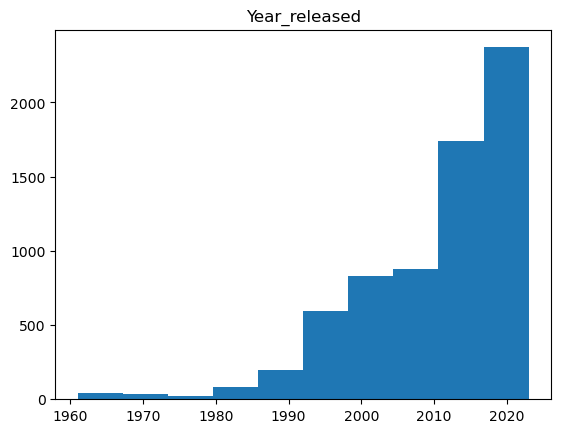

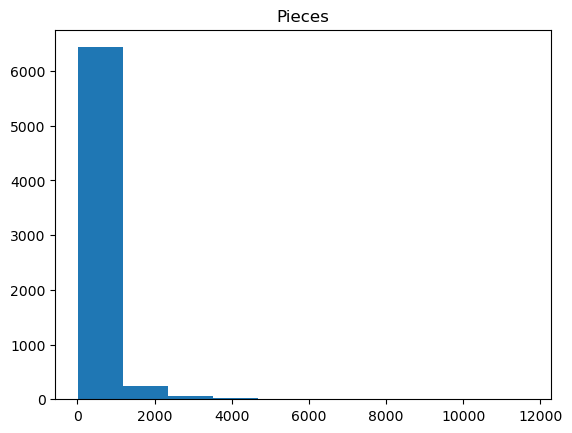

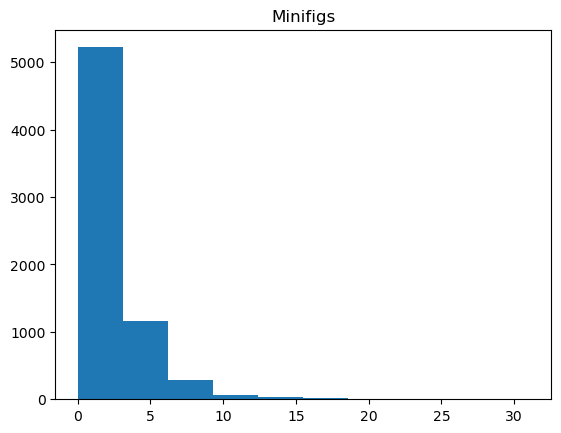

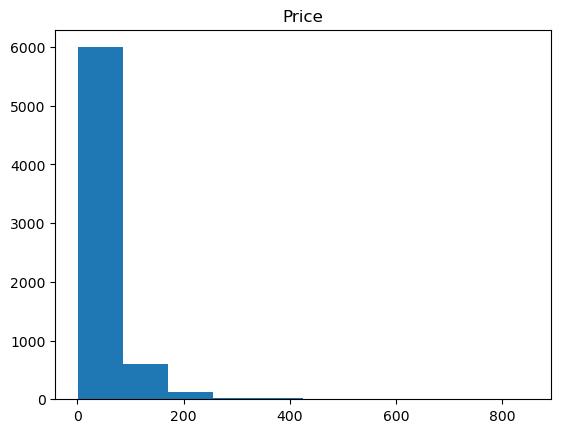

In [43]:
for i in lego_num.columns:
    plt.hist(lego_mod_df[i])
    plt.title(i)
    plt.show()

These numerical histograms have not changed much.

               Year_released    Pieces  Minifigs     Price
Year_released       1.000000  0.171750  0.159015  0.229011
Pieces              0.171750  1.000000  0.286476  0.790456
Minifigs            0.159015  0.286476  1.000000  0.369076
Price               0.229011  0.790456  0.369076  1.000000


<Axes: >

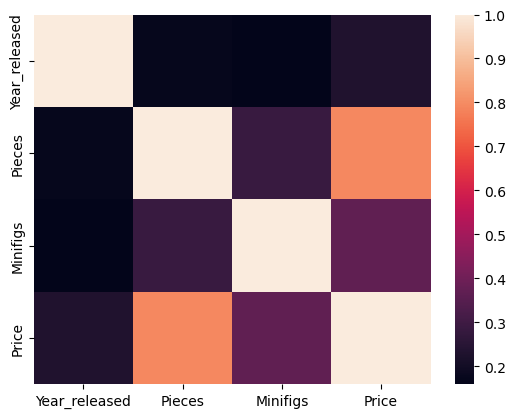

In [44]:
print(lego_num.corr())
sns.heatmap(lego_num.corr())

We see that this has very much decorrelated the number of Minifigs and Pieces and decorrelated Minifigs and Price.
This may be because of filling in the null values for n/a as well as removing so many of the "minifigure only" sets.

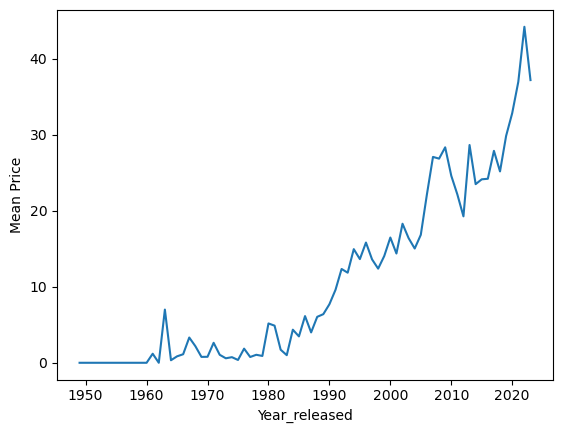

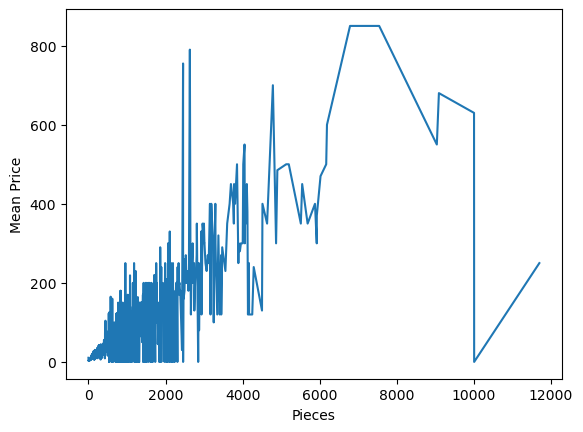

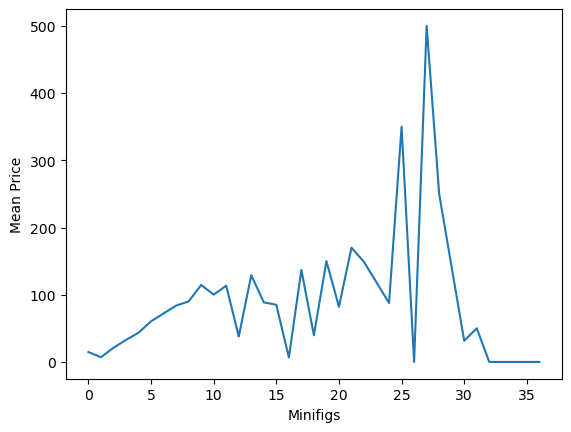

In [45]:
for i in lego_num_columns:
    if i !='Price':
        lego_group_mean = lego_num.groupby(i)['Price'].mean()
        ax = lego_group_mean.plot(kind ='line')
        ax.set_xlabel(i)
        ax.set_ylabel("Mean Price")
        plt.show()

This looks similar.

We could rerun the histograms for the categorical data, but as those are difficult to read there probably wouldn't be a lot of insight gained.


## Conclusions
We have removed a lot of data which did not quite fit the need for the end objective. Namely Lego products that were not real lego sets. 

We have dealt with null values (mostly by removing them, as they tended not to be purchasable lego sets).

The data is now for for use in an ML model. We will explore what to do with outliers and how they affect the accuracy of the model in the next project.